In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from itertools import chain

res_dir = os.path.join('results', 
                       'how_long_heuristic_is_better')

ns = list(range(1, 11 + 1))
families = ['euclidean', 'noise', 'truncated_urn', 'resampling']

res_dirs_wout_trials = {
    (n, family): os.path.join(res_dir, f'30x60_{n}', 'basin_hopping', family) for family in families for n in ns}


res_dirs_w_trials = {(n, family): list(sorted(name for name in os.listdir(res_dir_wout_trials) if os.path.isdir(os.path.join(res_dir_wout_trials, name)))) for (n, family), res_dir_wout_trials in res_dirs_wout_trials.items()}


In [9]:
ns

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [10]:
res = []
drop_tail = True
for (n, family), trial_files in res_dirs_w_trials.items():
    if drop_tail:
        trial_files = trial_files[:-1]
    for trial_file in trial_files:
        with open(os.path.join(res_dirs_wout_trials[(n, family)], trial_file, 'new_heuristics_approvalwise_vectors.txt')) as f:
            lines = f.readlines()
            count = len(lines) - 1
            i_trial = int(trial_file[-1])
            res.append({'n': n, 'family': family, 'trial': i_trial, 'count': count})

for n in ns:
    res.append({'n': n, 'family': 'gurobi', 'trial': 0, 'count': n})


df = pd.DataFrame(res)
# df = df.groupby(['family', 'n']).agg({'count': ['mean', 'std']})

# # df['count']['mean'] -= df['count'].index.get_level_values(1)
df

,n,family,trial,count
0,1,euclidean,0,1
1,1,euclidean,1,1
2,1,euclidean,2,1
3,1,euclidean,3,1
4,1,euclidean,4,1
...,...,...,...,...
207,7,gurobi,0,7
208,8,gurobi,0,8
209,9,gurobi,0,9
210,10,gurobi,0,10


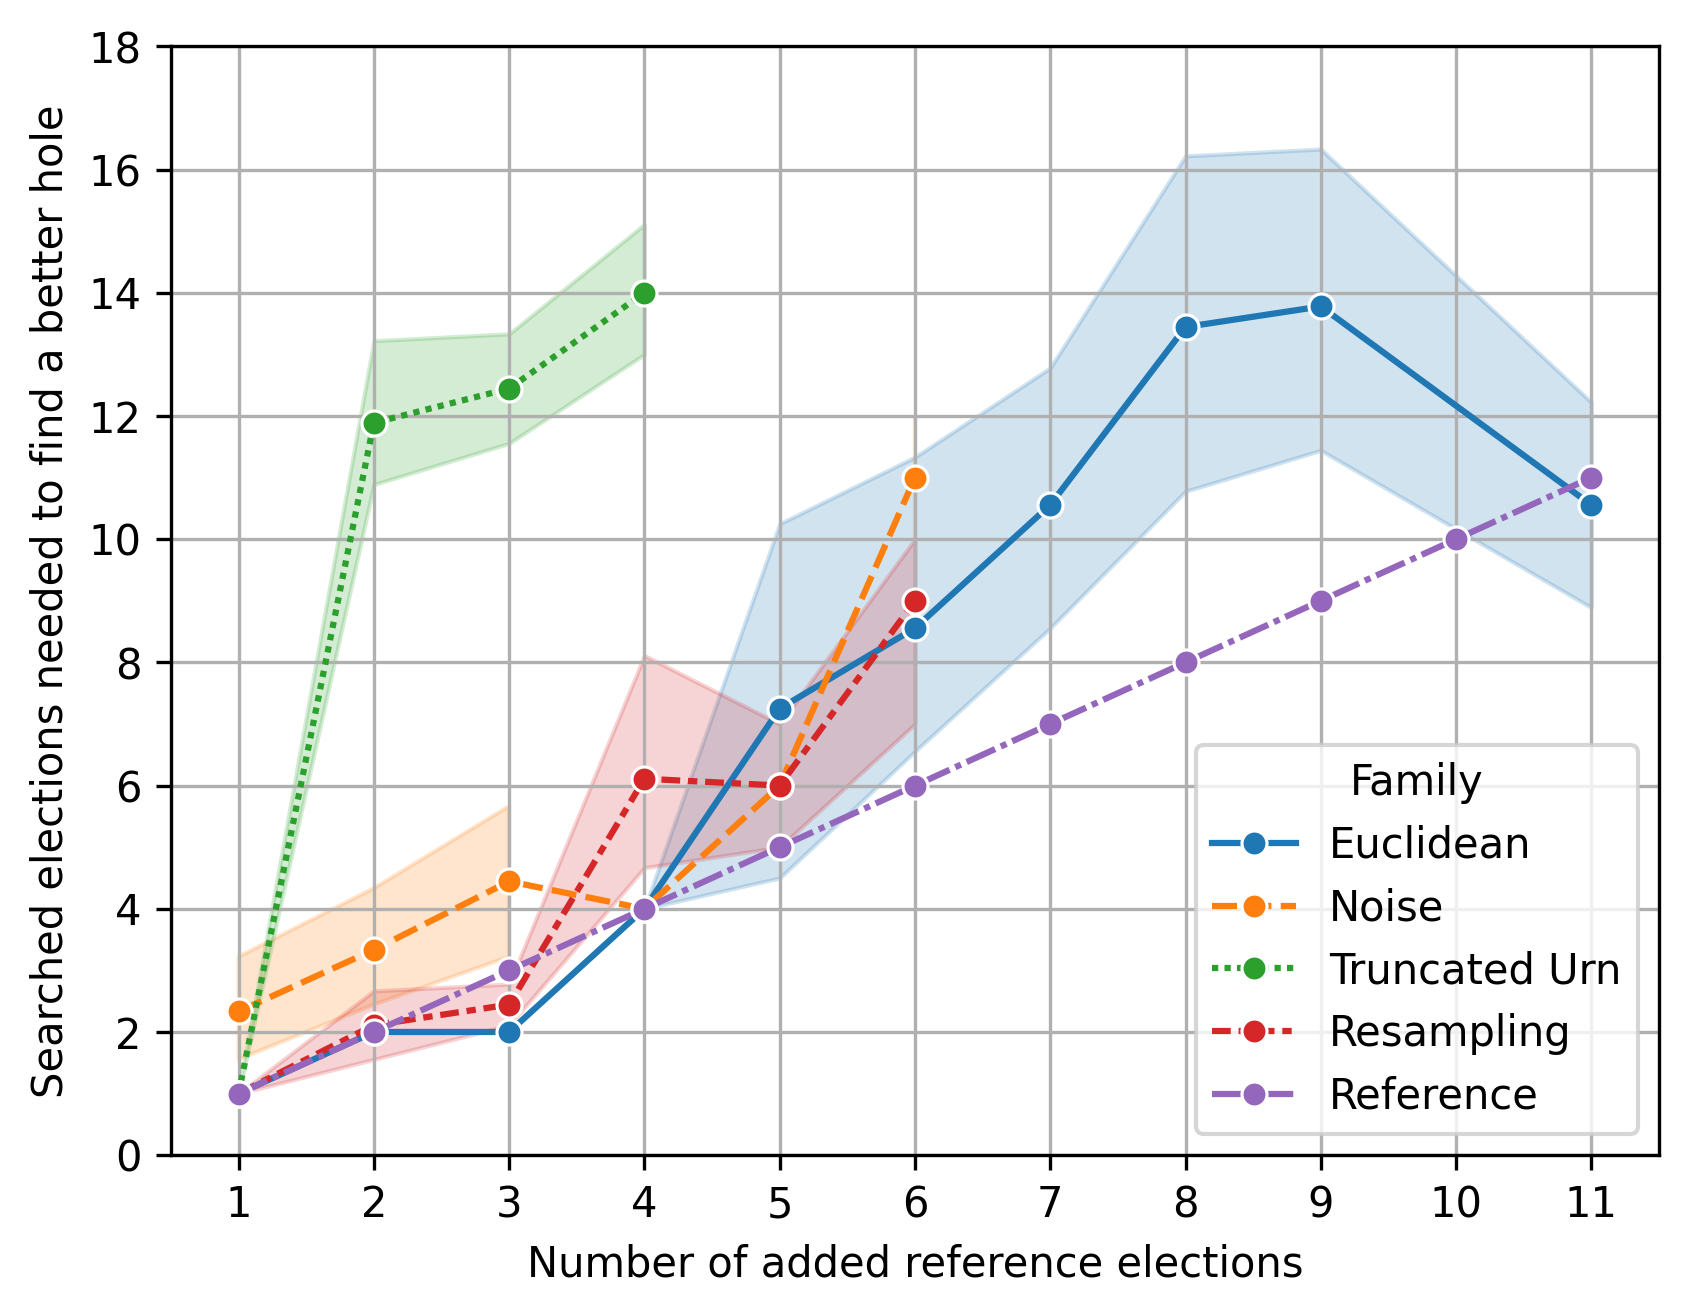

In [17]:
family_labels = {
    'euclidean': 'Euclidean',
    'truncated_urn': 'Truncated Urn',
    'noise': 'Noise',
    'resampling': 'Resampling',
    'gurobi': 'Reference'
}
df['Family'] = df['family'].map(family_labels)

fig, ax = plt.subplots(dpi=300)


ax = sns.lineplot(data=df, x='n', y='count', hue='Family', style='Family', marker='o', ax=ax)
plt.grid()
ax.set_xlabel('Number of added reference elections')
ax.set_ylabel('Searched elections needed to find a better hole')

ax.set_xticks(ns)
ax.set_yticks(list(range(0, 19, 2)))
ax.grid(True)


KeyError: 'euclidean'

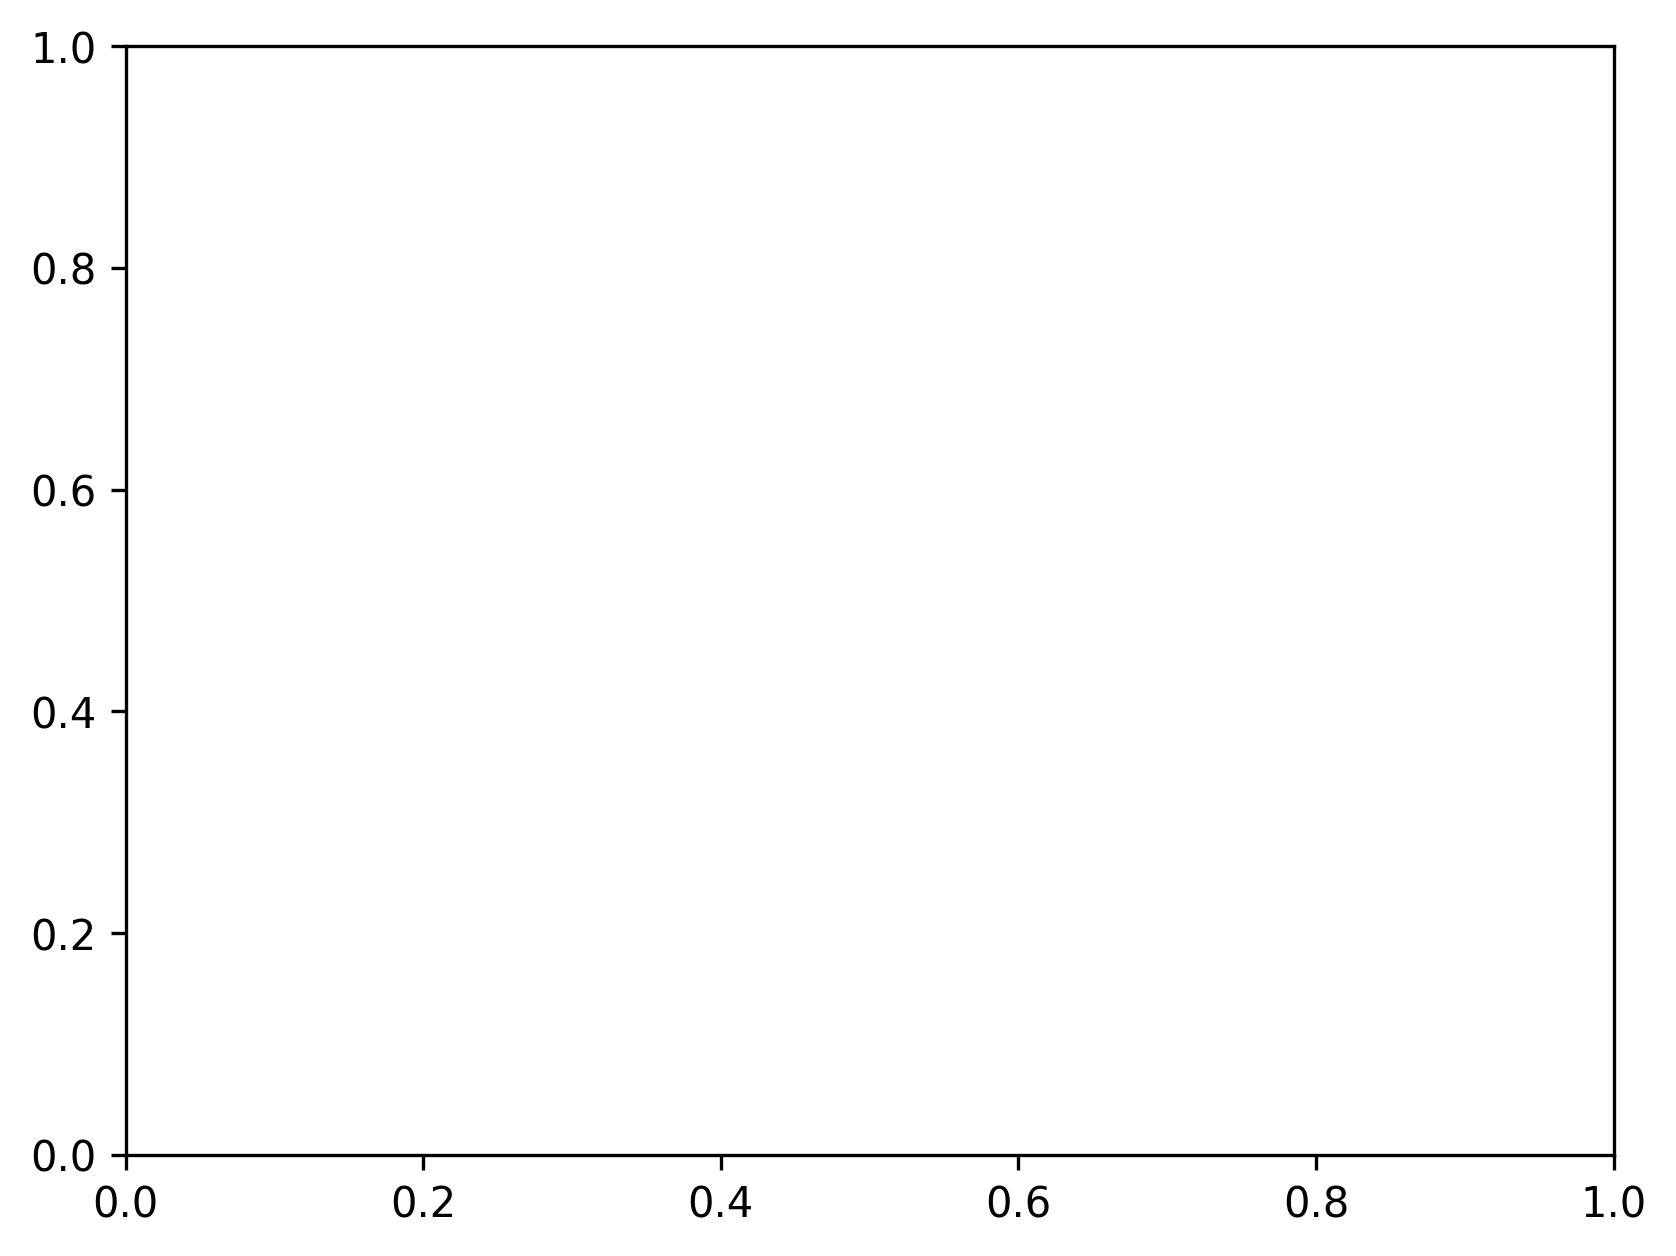

In [16]:
fig, ax = plt.subplots(dpi=300)

for family in families:
    df_family = df.loc[family]
    ax.errorbar(df_family.index, df_family['count']['mean'], yerr=df_family['count']['std'], label=family, fmt='--o')
    
reference_result = df['count'].index.get_level_values(1)
# ax.plot(ns, ns, color='black', linestyle='--', zorder=20, linewidth=2)    
ax.errorbar(ns, ns, label='reference', color='black', zorder=20, fmt='--o')    
    

ax.legend()
ax.set_xlabel('Number of reference elections')
ax.set_ylabel('Searched elections count')

ax.set_xticks(ns)
ax.set_yticks(list(range(0, 19, 2)))
ax.grid(True)


fig.tight_layout()